<a href="https://colab.research.google.com/github/SarahBarbosa/AluraDataChallenge_2/blob/main/S01_Limpeza_analise_exploratoria_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://imgur.com/QnT31vZ.png)

---

# Sobre o desafio

Neste desafio, suponhamos que tenhamos sido recrutados como cientistas de dados pela empresa de telecomunicações **Novexus**. Durante nossa reunião introdutória com os responsáveis da equipe de vendas da organização, foi destacada a significância da redução da **Taxa de Churn**, também conhecida como **Taxa de Evasão de Clientes**.

Com base em nossa experiência, propomos como etapa inicial a identificação dos clientes com maior propensão a abandonar os serviços da Novexus. Isso gerou um consenso entre todos os membros da equipe sobre a importância de investigar minuciosamente as características dos clientes e dos planos utilizados, a fim de **CLASSIFICAR** esses indivíduos como possíveis candidatos à desistência ou como clientes prováveis de permanecerem.

Durante a primeira semana, nosso foco estará na tarefa de Extração, Transformação e Carregamento (ETL) e na Análise Exploratória de Dados (EDA).

<div style="background-color: #171821; color: white; padding: 10px; text-align: center; font-size: 20px;">
    <h1>Informações gerais do Conjunto de dados</h1>
</div>

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Github/AluraDataChallenge_2')

## Acesso aos dados, normalização e visualização rápida do cabeçalho

In [2]:
import pandas as pd
import requests
import json

url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
dados = requests.get(url).json()
dados = pd.json_normalize(dados)

In [3]:
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
diretorio = '/content/drive/MyDrive/Github/AluraDataChallenge_2/Dados'
dados.to_csv(diretorio+'/dados_novexus.csv', index = False)

## Leitura do dicionário dos dados

In [5]:
import os
url_info = 'https://challenge-data-science-3ed.s3.amazonaws.com/dicionario.md'

response = requests.get(url_info).content.decode('utf-8')
nome_arquivo = 'dicionario_colunas.txt'
path = os.path.join(diretorio, nome_arquivo)

with open(path, 'w', encoding='utf-8') as arquivo:
  arquivo.write(response)

In [6]:
print(response)

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co

## Valores únicos e análise da tipagem dos dados

In [7]:
import justdoit as jdi
jdi.descricao_colunas(dados)

# customerID: object, 7267/7267 valores únicos
# Churn: object, Valores Únicos: No, Yes, 
# customer.gender: object, Valores Únicos: Female, Male
# customer.SeniorCitizen: int64, Valores Únicos: 0, 1
# customer.Partner: object, Valores Únicos: Yes, No
# customer.Dependents: object, Valores Únicos: Yes, No
# customer.tenure: int64, 73/7267 valores únicos
# phone.PhoneService: object, Valores Únicos: Yes, No
# phone.MultipleLines: object, Valores Únicos: No, Yes, No phone service
# internet.InternetService: object, Valores Únicos: DSL, Fiber optic, No
# internet.OnlineSecurity: object, Valores Únicos: No, Yes, No internet service
# internet.OnlineBackup: object, Valores Únicos: Yes, No, No internet service
# internet.DeviceProtection: object, Valores Únicos: No, Yes, No internet service
# internet.TechSupport: object, Valores Únicos: Yes, No, No internet service
# internet.StreamingTV: object, Valores Únicos: Yes, No, No internet service
# internet.StreamingMovies: object, Valores Únicos

Algumas observações:

- A coluna `customerID` contém 7267 valores únicos, o que sugere que cada registro representa um cliente distinto.
- A coluna `Churn` possui alguns valores em branco.
- A coluna `Charges.Total` é sinalizada como tipo `object` (strings).

Vamos analisar a coluna `Charges.Total`:

In [8]:
print(list(dados['account.Charges.Total'].head()))
print(dados['account.Charges.Total'].dtype)

['593.3', '542.4', '280.85', '1237.85', '267.4']
object


Observe que, embora os valores sejam números decimais (float), eles estão sendo apresentados como strings. Vamos converter para o tipo float:

In [9]:
tratamentos = jdi.Tratamentos(dados)
tratamentos.string_to_float(colunas = 'account.Charges.Total')

In [10]:
dados.isna().sum()

customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

Quando convertemos a coluna `account.Charges.Total` de tipo 'object' para 'float64', observamos a presença de valores ausentes no conjunto de dados.

<div style="background-color: #171821; color: white; padding: 10px; text-align: center; font-size: 20px;">
    <h1> Tratamento inicial das incosistências nos dados </h1>
</div>

Resolvendo o problema dos dados em branco para a coluna `Churn`: excluindo essas instâncias!

In [11]:
dados = tratamentos.remove_ausentes(colunas = 'Churn', string = True)

<div style="background-color: #171821; color: white; padding: 10px; text-align: center; font-size: 20px;">
    <h1> Exploratory Data Analysis </h1>
</div>

## Paleta de cores

![](https://imgur.com/flj5sG5.png)

In [12]:
# palette = 'novexus'
paleta = ['#171821', '#872b95', '#ff7131', '#fe3d67']

## Visualização da variável target (Churn)

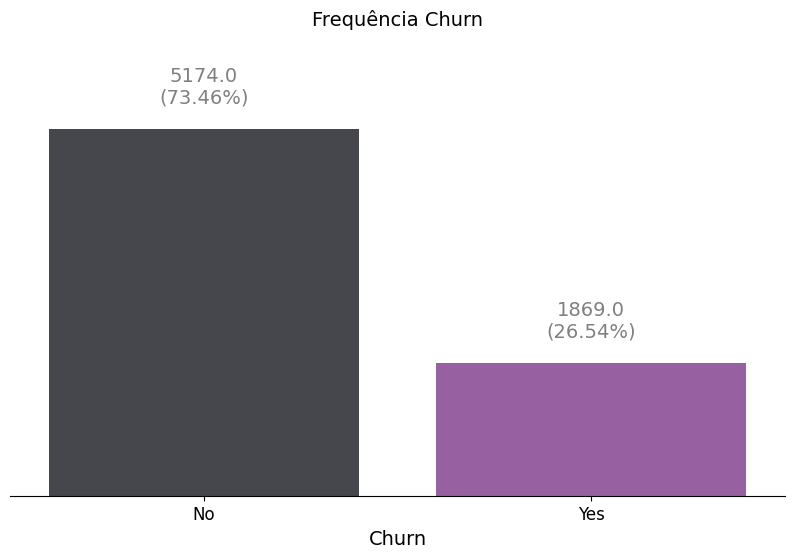

In [13]:
import justplotit as jpi
jpi.frequencia_churn(dados)

Os dados estão desequilibrados, com uma grande maioria de clientes (cerca de 73.46%) que não cancelaram o serviço, enquanto apenas 26.54% cancelaram. Isso significa que qualquer previsão feita com esses dados provavelmente favorecerá os clientes que não cancelaram o serviço. Além disso, qualquer representação visual dos dados também destacará esse desequilíbrio.

## Features categóricas versus Churn

### Grupo 1: Features com informações sobre os clientes

In [14]:
grupo_1 = dados.filter(like='customer').columns.tolist()[1:-1]

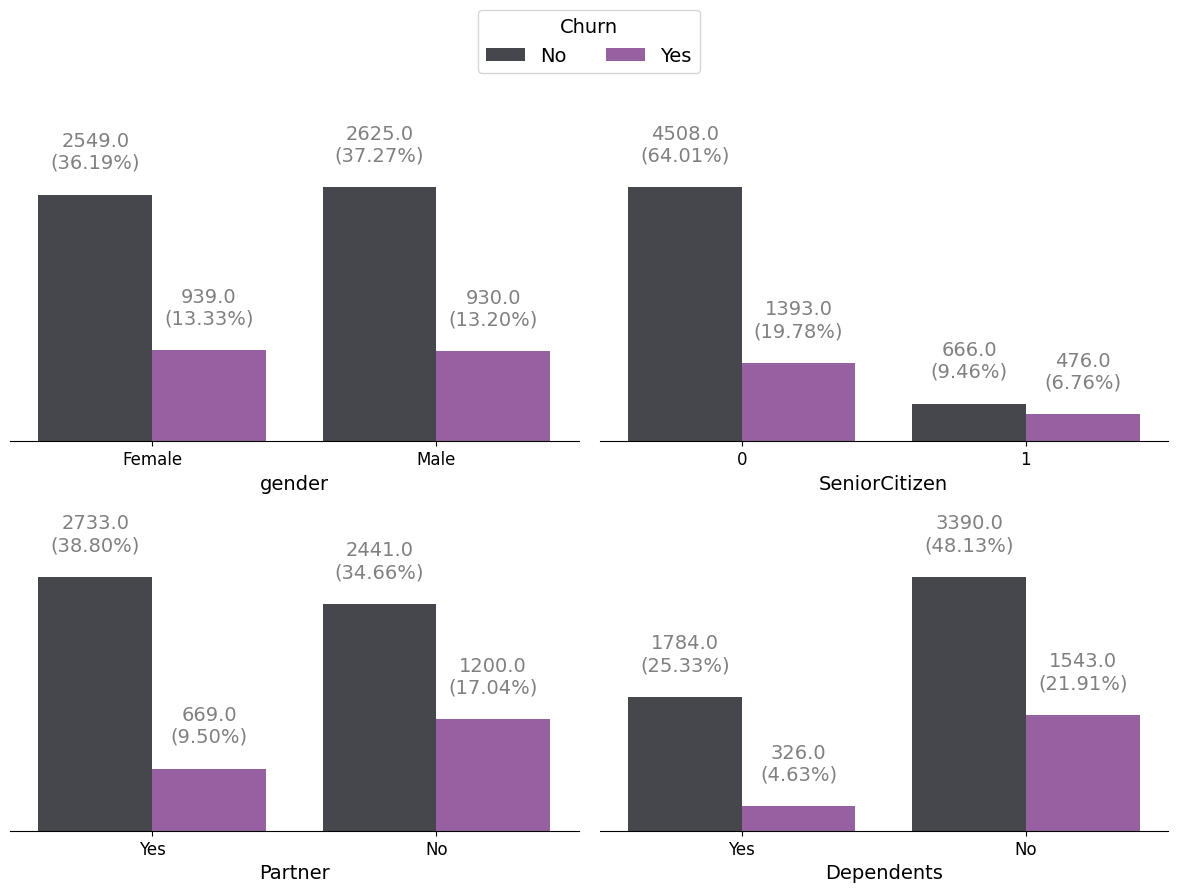

In [15]:
jpi.countplots(dados, 'Churn', grupo_1, paleta)

A taxa de cancelamento de clientes é praticamente igual tanto para homens quanto para mulheres. Além disso, o número de clientes idosos é relativamente baixo. Os clientes que vivem com um parceiro têm menos probabilidade de cancelar em comparação com aqueles que não têm parceiros. Da mesma forma, as taxas de cancelamento são mais altas entre os clientes que não têm dependentes.

### Grupo 2: Features com serviços telefônicos

In [16]:
grupo_2 = dados.filter(like='phone').columns.tolist()

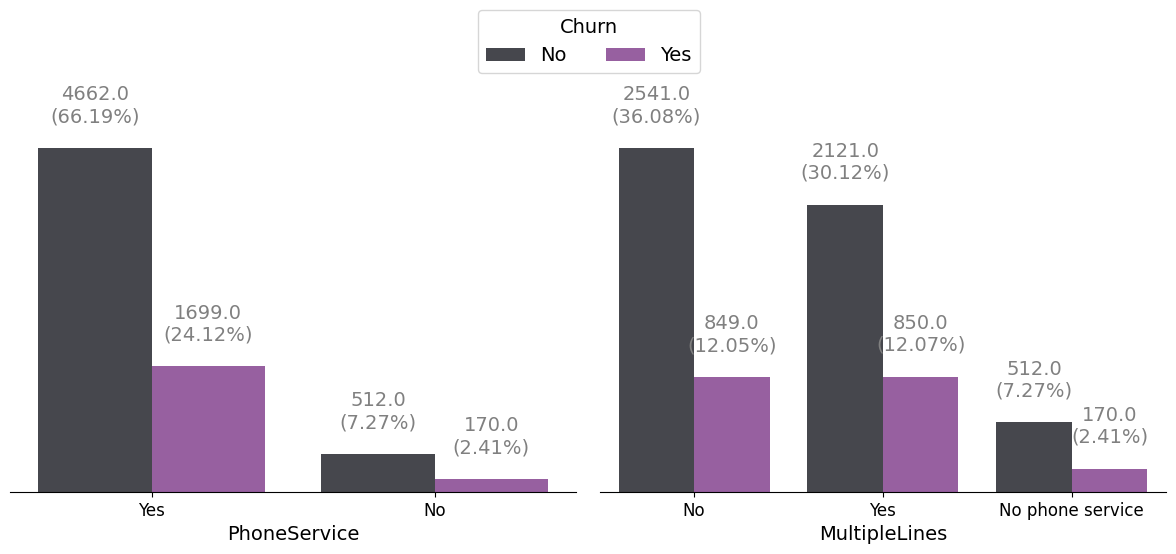

In [17]:
jpi.countplots(dados, 'Churn', grupo_2, paleta, figsize=(12, 5))

Para o PhoneService, mesmo que alguns clientes não tenham serviço telefônico, mais deles foram mantidos em comparação com o número de clientes que decidiram interromper o serviço. Em relação às MultipleLines (Múltiplas Linhas), a taxa de cancelamento permanece a mesma, quer os clientes tenham ou não várias linhas.

### Grupo 3: Features com serviços de internet

In [18]:
grupo_3 = dados.filter(like='internet').columns.tolist()

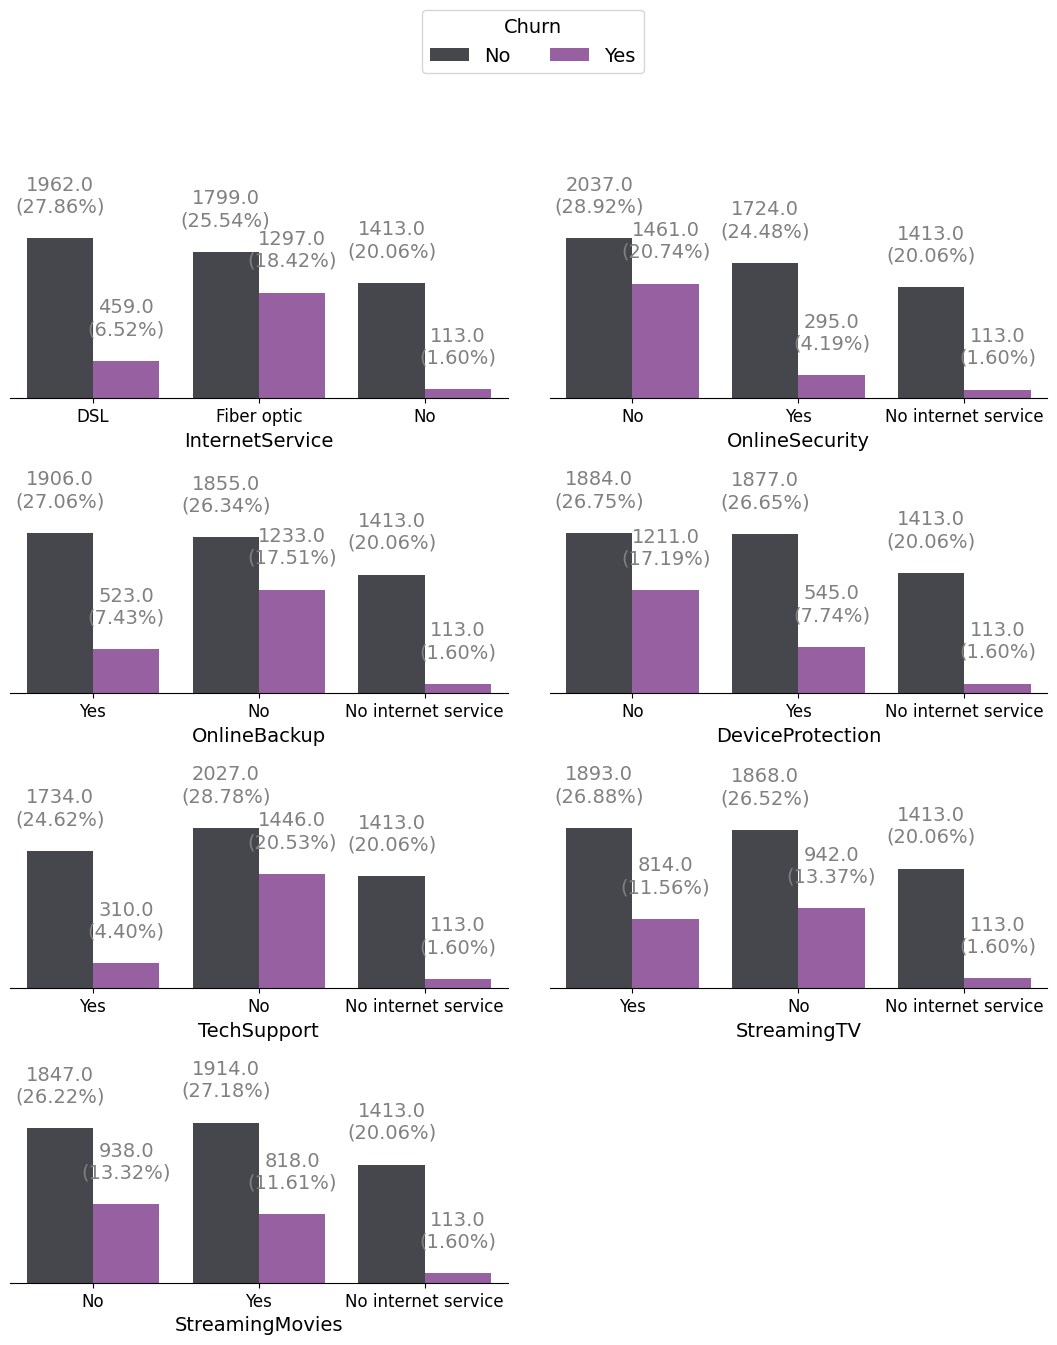

In [19]:
jpi.countplots(dados, 'Churn', grupo_3, paleta, figsize=(11, 12))

Muitos clientes mostraram hesitação em adotar cabos de fibra ótica como meio de fornecer serviços de Internet. Pelo contrário, de acordo com o primeiro gráfico, os clientes têm preferência por utilizar DSL para acessar a Internet. As categorias de Streaming de TV e Streaming de Filmes apresentam gráficos praticamente idênticos. Independentemente de estarem inscritos em Streaming de TV ou Streaming de Filmes, muitos clientes optaram por cancelar o serviço. Parece que o conteúdo de streaming não foi o único fator responsável por essa decisão.

No que diz respeito à satisfação dos clientes, fica evidente, a partir dos gráficos, que serviços como OnlineSecurity, OnlineBackup, DeviceProtection e TechSupport desempenham um papel fundamental. Um considerável quantidade de clientes que não possuiam essses serviços optaram deixar a empresa Novexus.

### Grupo 4: Features com assuntos financeiros dos clientes

In [20]:
grupo_4 = dados.filter(like='account').columns.tolist()[:-2]

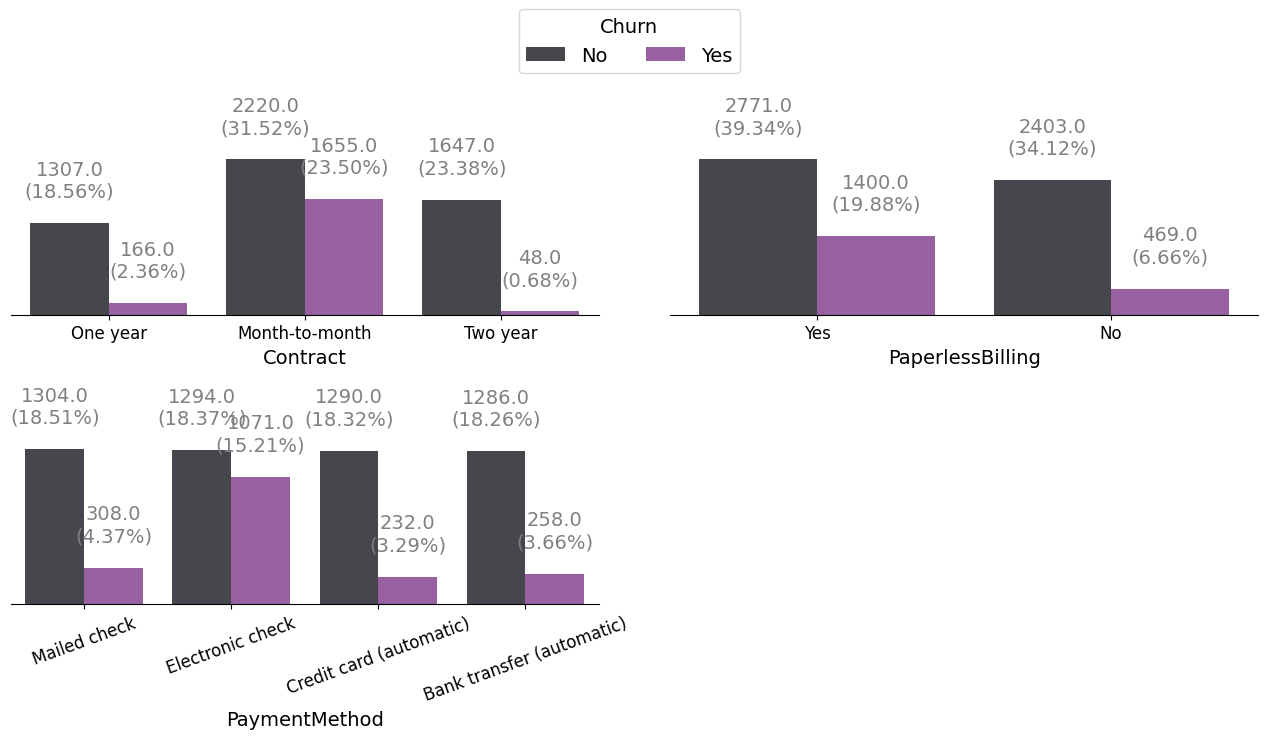

In [21]:
import matplotlib.pyplot as plt
jpi.countplots(dados, 'Churn', grupo_4, paleta, figsize=(13, 6))
plt.xticks(rotation=20)
plt.show()

A alta taxa de rotatividade de clientes em contratos mensais pode ser atribuída a várias razões. Uma delas é a possibilidade de os clientes estarem experimentando diferentes serviços disponíveis, optando pelo contrato de um mês como uma forma de economizar dinheiro enquanto testam. Além disso, a inconsistência na qualidade dos serviços de Internet, streaming e telefone pode ser outro fator contribuinte. Como as prioridades dos clientes variam, se um desses serviços não atender às expectativas, muitas vezes resulta no cancelamento de todos os serviços.

Um fenômeno notável é a alta incidência de clientes de deixa a empresa no PaperlessBilling. Isso pode estar relacionado a problemas de pagamento ou recebimento que os clientes enfrentam. É evidente que os clientes não estão satisfeitos com o método de pagamento por cheque eletrônico. Portanto, a empresa claramente precisa reconsiderar o uso do cheque eletrônico como forma de pagamento, optando por simplificá-lo e torná-lo mais amigável para os clientes ou mesmo considerar a sua eliminação.

## Features numércias

In [22]:
features_num = dados.select_dtypes(exclude=['object']).iloc[:, 1:]  # Excluindo o SeniorCitizen
features_num.head()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
0,9,65.6,593.30
1,9,59.9,542.40
2,4,73.9,280.85
3,13,98.0,1237.85
4,3,83.9,267.40


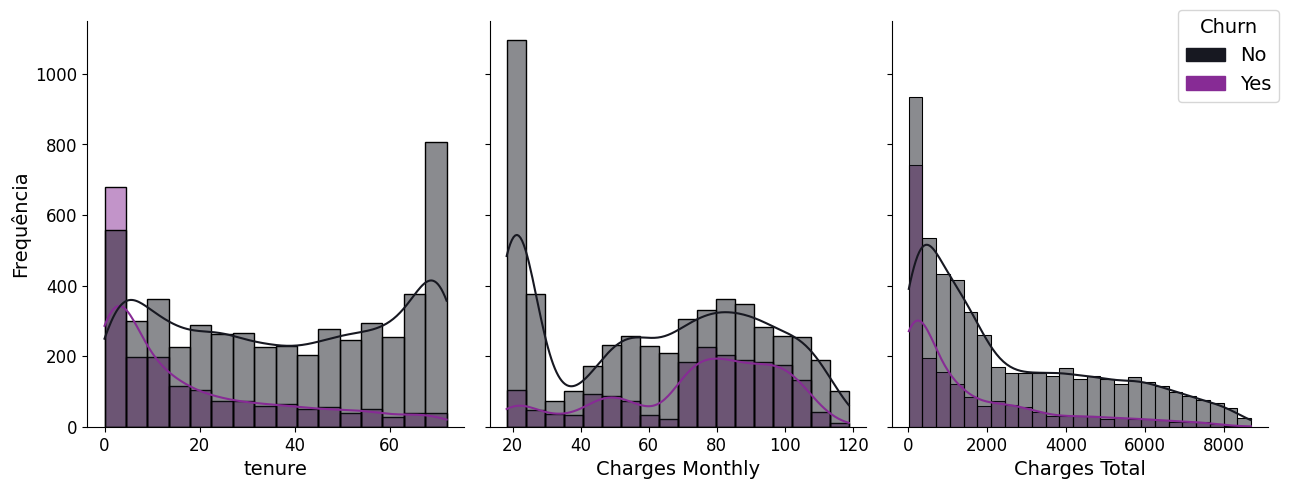

In [23]:
jpi.histogramas(dados, features_num, paleta)

Tenure e Charges Monthly possuem uma distribuição bimodal, apresentando picos notáveis em 0 e 70 para a Tenure e 20 e 80 para as Charges Monthly. Por outro lado, TotalCharges demonstra uma distribuição assimétrica positiva (caldas longas).

### Boxplot para as variáveis numéricas com Churn

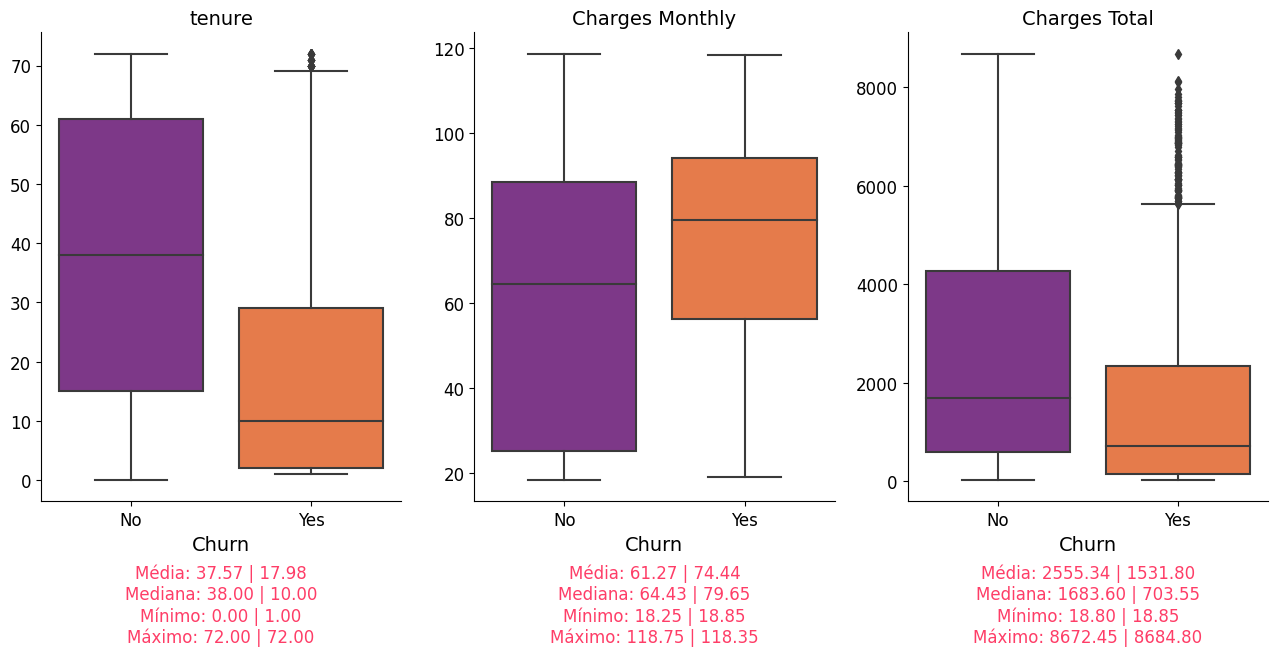

In [24]:
jpi.boxplots(dados, features_num, paleta)

Os clientes que optam por continuar têm, em média, contratos mais longos em comparação com aqueles que decidem cancelar. De forma surpreendente, os clientes que cancelaram seus contratos apresentam, em média, gastos mensais mais elevados do que os que permaneceram. Isso merece atenção, pois sugere a possibilidade de que clientes com despesas mais substanciais possam ser mais propensos a cancelar (talvez devido a variações nos tipos de serviços utilizados, como mencionado anteriormente). Além disso, é interessante observar que os clientes que cancelaram têm uma média de gastos totais mais baixa do que os que continuaram. Isso indica que, embora gastem mais em base mensal, essa tendência não se mantém a longo prazo, o que levanta a hipótese de que clientes com despesas mais elevadas não necessariamente representam maior valor a longo prazo para a empresa.

<div style="background-color: #171821; color: white; padding: 10px; text-align: center; font-size: 20px;">
    <h1> Análise da correlação das variáveis </h1>
</div>

A utilização da correlação pode aprimorar a acurácia do modelo ao eliminar variáveis preditoras sem relevância. Quando uma variável não demonstra uma correlação significativa com a variável-alvo, é provável que possua pouco poder informativo, não contribuindo de maneira substancial para o modelo e, em certos cenários, podendo até induzir overfitting.

A fim de aprimorar nossa compreensão da correlação entre as variáveis, vamos realizar uma codificação one-hot nos dados categóricos previamente (lembrando que repetiremos este processo na próxima semana).

## Encoding prévio nos dados categóricos

In [25]:
dados.select_dtypes(exclude = ['int', 'float']).columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.Partner',
       'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
       'internet.InternetService', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')

A coluna do ID do cliente não é relevante para nossos dados:

In [26]:
dados = jdi.Tratamentos(dados).remove_colunas('customerID')

Vamos transformar as variáveis categóricas em valores binários:

In [27]:
colunas_sim_nao = ['Churn', 'customer.Partner', 'customer.Dependents',
                   'phone.PhoneService', 'account.PaperlessBilling']

colunas_multiclasses = ['internet.InternetService', 'account.Contract',
                        'account.PaymentMethod']

colunas_mistas = ['phone.MultipleLines', 'internet.OnlineSecurity',
                  'internet.OnlineBackup', 'internet.DeviceProtection',
                  'internet.TechSupport', 'internet.StreamingTV',
                  'internet.StreamingMovies']

dados = jdi.encoding_manual(dados, colunas_sim_nao, colunas_multiclasses, colunas_mistas)

Optamos usar o `jdi.encoding_manual` em vez de utilizar o `get_dummies` diretamente pois queríamos manter o melhor controle possível sobre os valores a serem binarizados.

In [28]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7043 non-null   int64  
 1   customer.gender                                  7043 non-null   int64  
 2   customer.SeniorCitizen                           7043 non-null   int64  
 3   customer.Partner                                 7043 non-null   int64  
 4   customer.Dependents                              7043 non-null   int64  
 5   customer.tenure                                  7043 non-null   int64  
 6   phone.PhoneService                               7043 non-null   int64  
 7   phone.MultipleLines                              7043 non-null   int64  
 8   internet.OnlineSecurity                          7043 non-null   int64  
 9   internet.OnlineBackup         

Vamos olhar as colunas que indicam aparentemente a mesma coisa:

In [29]:
sem_servico_internet = ['internet.InternetService_No', 'No_internet_service']
set(list(dados[sem_servico_internet].itertuples(index=False, name=None)))

{(0, 0), (1, 1)}

Ok. O que isso indica é que quando a coluna `internet.InternetService_No` possui o valor 0, a coluna `No_internet_service` também possui o valor 0, e o mesmo é verdadeiro no sentido oposto. Isso implica que ambas as colunas são equivalentes, portanto, podemos eliminar uma delas:

In [30]:
dados = jdi.Tratamentos(dados).remove_colunas(sem_servico_internet[0])

Vejamos o caso para o serviço de telefonia:

In [31]:
sem_servico_telefone = ['phone.PhoneService', 'No_phone_service']
set(list(dados[sem_servico_telefone].itertuples(index=False, name=None)))

{(0, 1), (1, 0)}

Na verdade, a situação aqui é inversa: quando uma delas possui o valor 0, a outra terá o valor 1, e vice-versa. Para entender, a coluna `phone.PhoneService` indica se o serviço está disponível (1) ou não (0), enquanto a coluna `No_phone_service` indica se o serviço não está disponível (1) ou está disponível (0). Portanto, essas duas colunas são complementares, e é possível remover uma delas sem perda de informação:

In [32]:
dados = jdi.Tratamentos(dados).remove_colunas(sem_servico_telefone[0])

In [33]:
jdi.descricao_colunas(dados)

# Churn: int64, Valores Únicos: 0, 1
# customer.gender: int64, Valores Únicos: 1, 0
# customer.SeniorCitizen: int64, Valores Únicos: 0, 1
# customer.Partner: int64, Valores Únicos: 1, 0
# customer.Dependents: int64, Valores Únicos: 1, 0
# customer.tenure: int64, 73/7043 valores únicos
# phone.MultipleLines: int64, Valores Únicos: 0, 1
# internet.OnlineSecurity: int64, Valores Únicos: 0, 1
# internet.OnlineBackup: int64, Valores Únicos: 1, 0
# internet.DeviceProtection: int64, Valores Únicos: 0, 1
# internet.TechSupport: int64, Valores Únicos: 1, 0
# internet.StreamingTV: int64, Valores Únicos: 1, 0
# internet.StreamingMovies: int64, Valores Únicos: 0, 1
# account.PaperlessBilling: int64, Valores Únicos: 1, 0
# account.Charges.Monthly: float64, 1585/7043 valores únicos
# account.Charges.Total: float64, 6530/7043 valores únicos
# internet.InternetService_DSL: int64, Valores Únicos: 1, 0
# internet.InternetService_Fiber optic: int64, Valores Únicos: 0, 1
# account.Contract_Month-to-month:

## Correlação features com a target

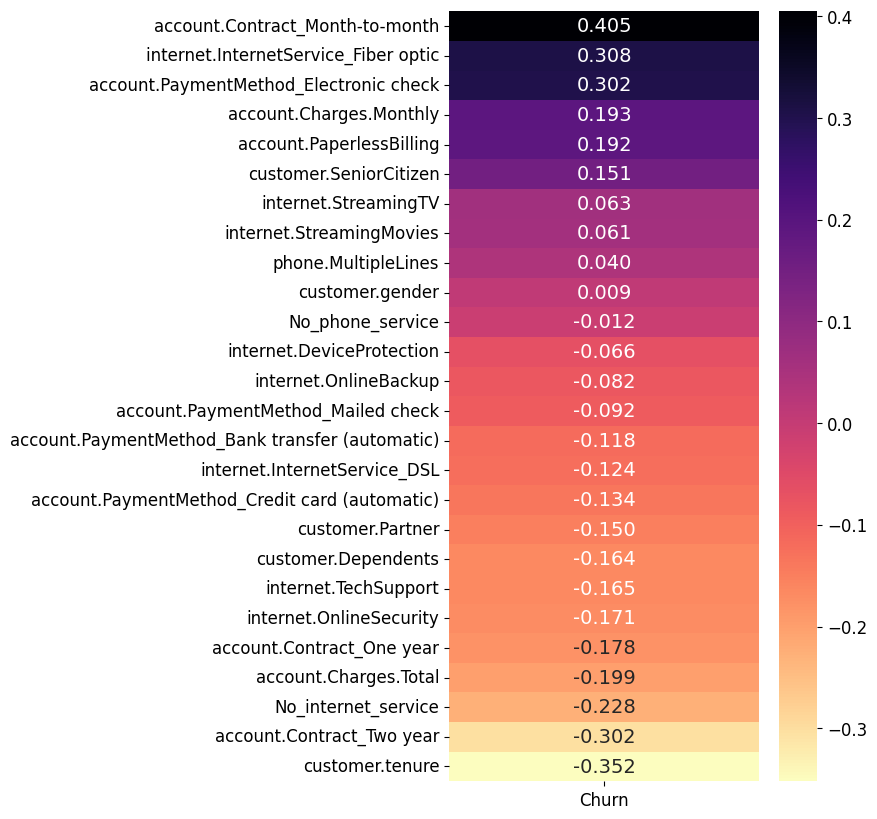

In [34]:
import seaborn as sns
corr = dados.corrwith(dados['Churn']).sort_values(ascending = False).to_frame().iloc[1:,:]
corr.columns = ['Churn']

plt.figure(figsize=(5, 10))
sns.heatmap(corr, annot = True, cmap = 'magma_r', fmt = '.3f')
plt.show()

- A coluna `Churn` foi removida, pois possui uma correlação de 1 consigo mesma, o que é evidente, uma vez que é a mesma variável.

- A correlação mais forte e positiva é com o contrato mensal. Isso indica que os clientes que possuem contratos mensais têm uma probabilidade significativamente maior de cancelar seus serviços em comparação com aqueles que têm contratos anuais ou bienais.

- Os clientes que utilizam o serviço de fibra ótica também apresentam uma correlação positiva, sugerindo que eles são mais propensos a cancelar em comparação com os clientes que utilizam outros tipos de conexão à Internet. Isso também se aplica ao pagamento eletrônico.

- Embora a correlação seja positiva para as despesas mensais, sua força é menor em comparação com as três primeiras variáveis. Isso sugere que clientes com mensalidades mais altas podem ter uma probabilidade ligeiramente maior de cancelar, mas essa relação não é tão marcante quanto outros fatores.

- A variável `customer.tenure` apresenta a correlação negativa mais forte. Quanto mais tempo um cliente permanece com a empresa, menor é a probabilidade de cancelamento. Isso também é coerente quando observamos a segunda variável mais negativa.

- A correlação negativa com a variável `NoInternetService` sugere que os clientes que não têm serviço de Internet são menos propensos a cancelar.

- Os clientes com dependentes também exibem uma correlação negativa, indicando que são menos propensos a cancelar em comparação com aqueles sem dependentes.

Resumidamente, fatores como a duração do contrato, a presença de serviços adicionais (como segurança na Internet e suporte técnico), métodos de pagamento eletrônico e a utilização de fibra ótica podem desempenhar um papel fundamental na retenção de clientes.

## Correlação entre as features

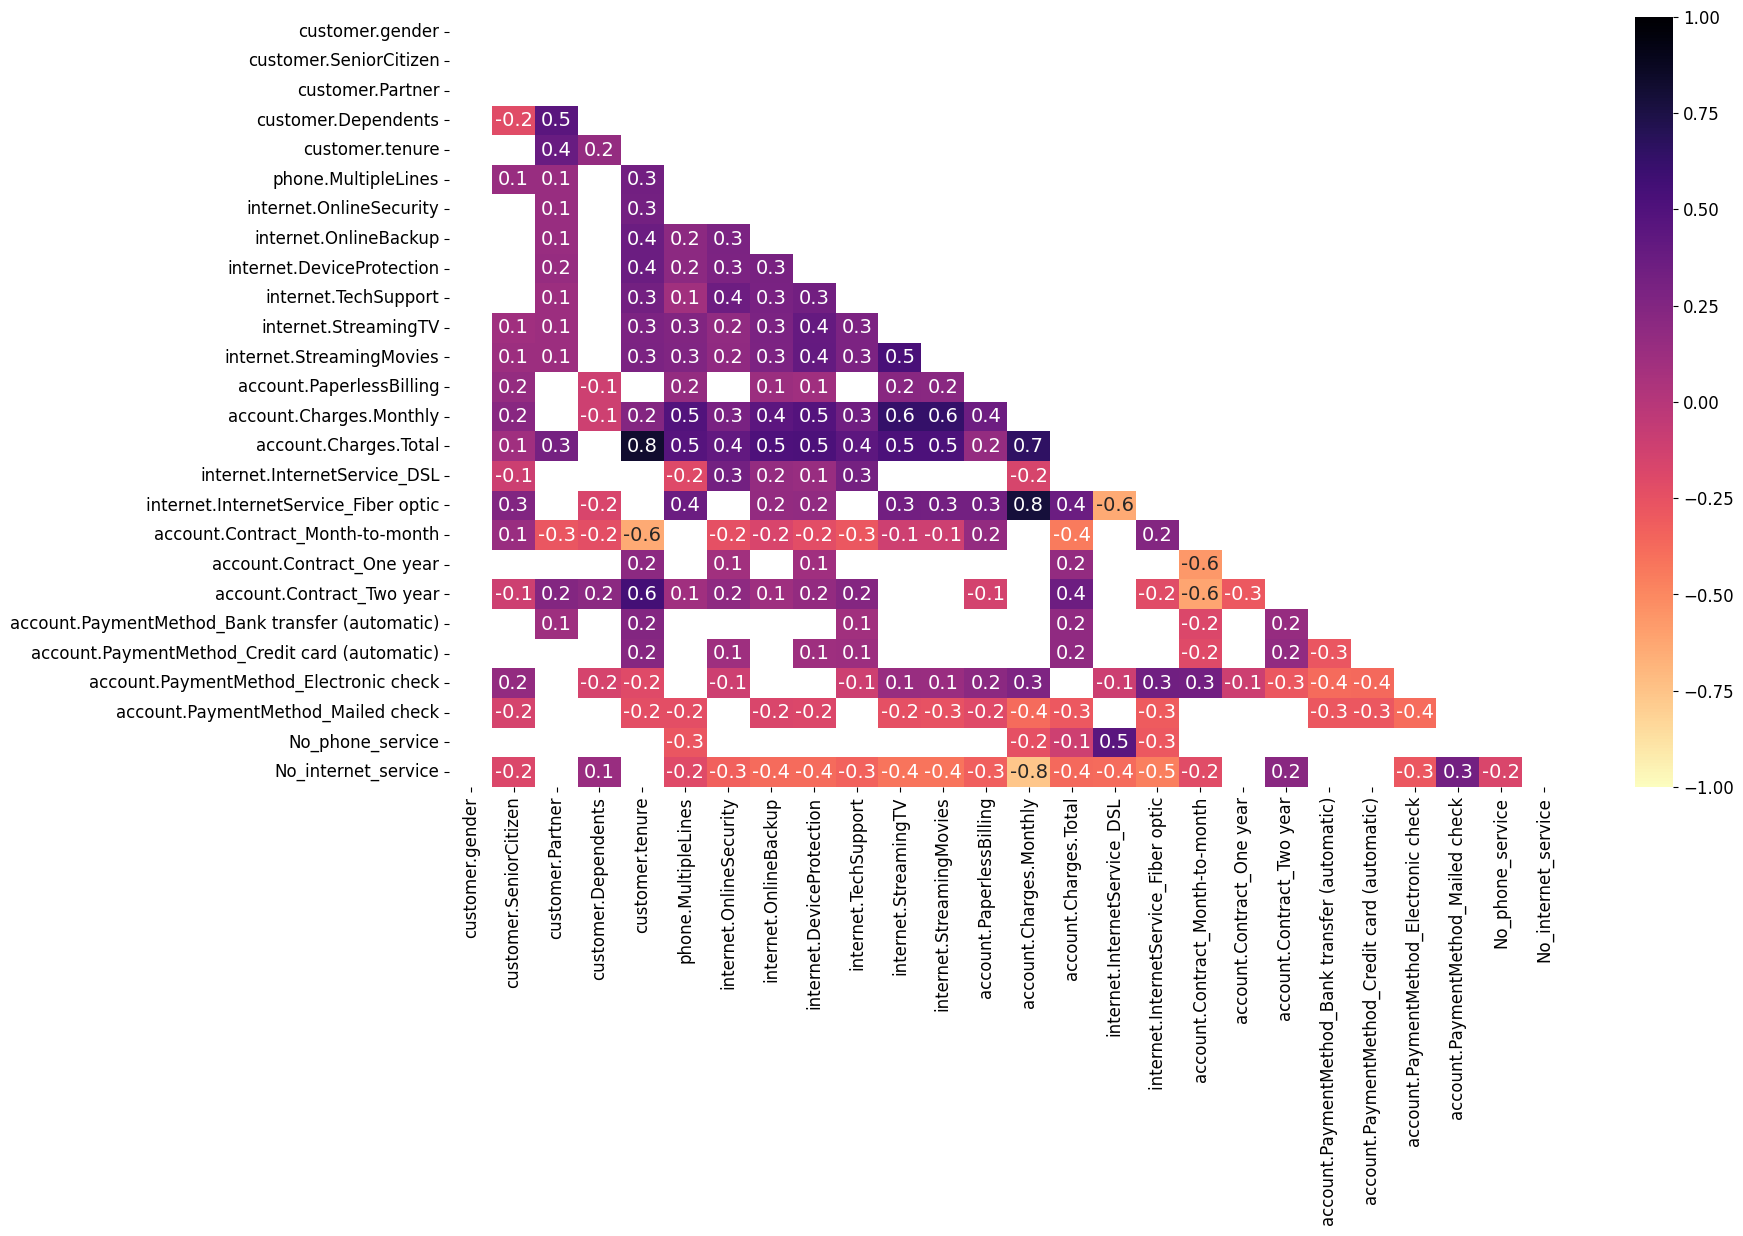

In [35]:
import numpy as np
plt.figure(figsize=(18, 10))

sem_churn = dados.drop(columns=['Churn'])
correlation_matrix = sem_churn.corr()

threshold = 0.1
zero_mask = np.abs(correlation_matrix) < threshold
upper_triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
mask = zero_mask | upper_triangle_mask

sns.heatmap(correlation_matrix, cmap='magma_r', mask=mask,
            annot=True, fmt='.1f', vmin=-1, vmax=1)

plt.show()

- O gênero do cliente não tem uma forte correlação com a maioria das outras variáveis.

- Ser um cliente sênior tem algumas correlações notáveis. Está negativamente correlacionado com ter dependentes e está positivamente correlacionado com ter múltiplas linhas telefônicas.

- Parceiro e Dependentes: Ter um parceiro e ter dependentes estão positivamente correlacionados, o que faz sentido, já que ter um parceiro frequentemente implica ter dependentes.

- Tempo de Permanência (Tenure): O tempo de permanência do cliente está positivamente correlacionado com muitas características relacionadas aos serviços de internet e telefone. Isso sugere que clientes de longo prazo são mais propensos a usar esses serviços, como indicado pelas correlações positivas com várias características de "internet" e "telefone".

- Tipo de Contrato: As características do "Contrato" mostram correlações negativas fortes com o "tempo de permanência do cliente". Clientes com contratos mensais tendem a ter tempos de permanência mais curtos, enquanto aqueles com contratos de dois anos têm tempos de permanência mais longos.

- Métodos de Pagamento: Diferentes métodos de pagamento mostram algumas correlações entre si, mas essas correlações geralmente são mais fracas em comparação com outras características. Por exemplo, "Transferência bancária (automática)" e "Cartão de crédito (automático)" têm uma correlação positiva, indicando que os clientes que usam um desses métodos podem ser mais propensos a usar o outro.

- NoPhoneService e NoInternetService: Essas características têm correlações negativas com vários outros atributos, o que é esperado. Por exemplo, "NoPhoneService" tem correlações negativas com "phone.MultipleLines" e vários serviços de "internet". Da mesma forma, "NoInternetService" tem correlações negativas com todos os serviços de "internet".

Pronto, nosso dados estão analisados o suficientes, podemos prosseguir para o próximo passo!